# Прочерчивание максимумов Х-структуры -- построение коллажей


In [11]:
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x7fc16a268240>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [12]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
import os
import shutil
import pandas as pd
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.lines as mlines
import warnings
from astropy.visualization import astropy_mpl_style
import copy
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
from libs.mathFunctions import explaw
from libs.mathFunctions import fit_by_explaw

In [52]:
n_galaxies = 18 # 18                                          |  scales     -  this is axis "r"  -     
#                               ell           |   for bins    | disk       | raw     | raw - disc
names = [['h_1237','h_1237_0_4',0.4,'NGC 560',4,52,2,0.75,0.75,107.62,40.16,27,33,0,0,27,33,0,0],
         ['h_eon150','h_eon150_0_4',0.4,'NGC 3101',12,47,2,0,1,51.93,20.87,28,42,0,0,28,42,0,0],
         ['ib_732','ib_732_0_4',0.4,'ESO 486-059',8,48,2,0.5,0.75,109.32,15.33,17,33,0,0,20,23,23,33],
         ['ib_1720','ib_1720_0_4',0.4,'NGC 3875',3,82,2,0,1,35.0,0,30,52,0,0,32,46,46,52],
         ['ib_2015','ib_2015_0_3',0.3,'PGC 3625943',12,32,1,0.5,0.75,25.57,13.7,14,21,0,0,14,21,0,0],
         ['mb_804','mb_804_0_4',0.4,'ESO 545-004',4,24,1,0,0.75,12.5,0,6,11,10.2,15.2,6,11,10.2,15],
         ['mb_1354','mb_1354_0_3',0.3,'PGC 1212349',4,40,2,0,1,69.81,17.16,13,35,0,0,27,30,30,35],
         ['mb_1640','mb_1640_0_3',0.3,'PGC 1470526',6,25,1,0,1,100.03,11.0,13,23,0,0,13,23,0,0],
         ['mb_eon183','mb_eon183_0_4',0.4,'NGC 4215',20,84,3,0.5,1,44.2,0,49,62,0,0,40,57,0,0],
         ['h_1237','h_1237_0_7',0.7,'NGC 560',4,52,1,0,0.75,107.62,40.16,25,38,0,0,25,38,0,0],
         ['h_eon150','h_eon150_0_7',0.7,'NGC 3101',3,36,1,0.5,1,51.93,20.87,22,35,0,0,22,35,0,0],
         ['ib_732','ib_732_0_7',0.7,'ESO 486-059',3,82,2,0,1,109.32,15.33,17,26.5,25,33,17,26.5,25,33],
         ['ib_1720','ib_1720_0_7',0.7,'NGC 3875',3,82,2,0,1,35.0,0,27,35,42,50,32,40,42,50],
         ['ib_2015','ib_2015_0_7',0.7,'PGC 3625943',12,30,1,0.5,0.75,25.57,13.7,12,19,0,0,12,19,0,0],
         ['mb_804','mb_804_0_7',0.7,'ESO 545-004',6,39,1,0,0.5,12.5,0,7,10,10.5,13,7,10,10.5,13],
         ['mb_1354','mb_1354_0_7',0.7,'PGC 1212349',4,40,2,0,1,69.81,17.16,16,25,25,32,20,32,0,0],
         ['mb_1640','mb_1640_0_7',0.7,'PGC 1470526',6,25,1,0,1,100.03,11.0,12,20,0,0,12,20,0,0],
         ['mb_eon183','mb_eon183_0_7',0.7,'NGC 4215',20,84,3,0.5,1,44.2,0,50,68,0,0,50,68,0,0]]

names_norm = ['NGC 560','NGC 3101','ESO 486-059','NGC 3875','PGC 3625943','ESO 545-004','PGC 1212349',
              'PGC 1470526','NGC 4215']

#names = [['h_1237','h_1237_0_7',0.7],['h_eon150','h_eon150_0_7',0.7],['ib_732','ib_732_0_7',0.7],
#         ['ib_1720','ib_1720_0_7',0.7],['ib_2015','ib_2015_0_7',0.7],['mb_804','mb_804_0_7',0.7],
#         ['mb_1354','mb_1354_0_7',0.7],['mb_1640','mb_1640_0_7',0.7],['mb_eon183','mb_eon183_0_7',0.7]]

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
ellipticity = 0.3-0.4
красное-исходные
фиолетовое - исходное минус диск
зеленое-балджи
синее-модель диска
черное-вычет


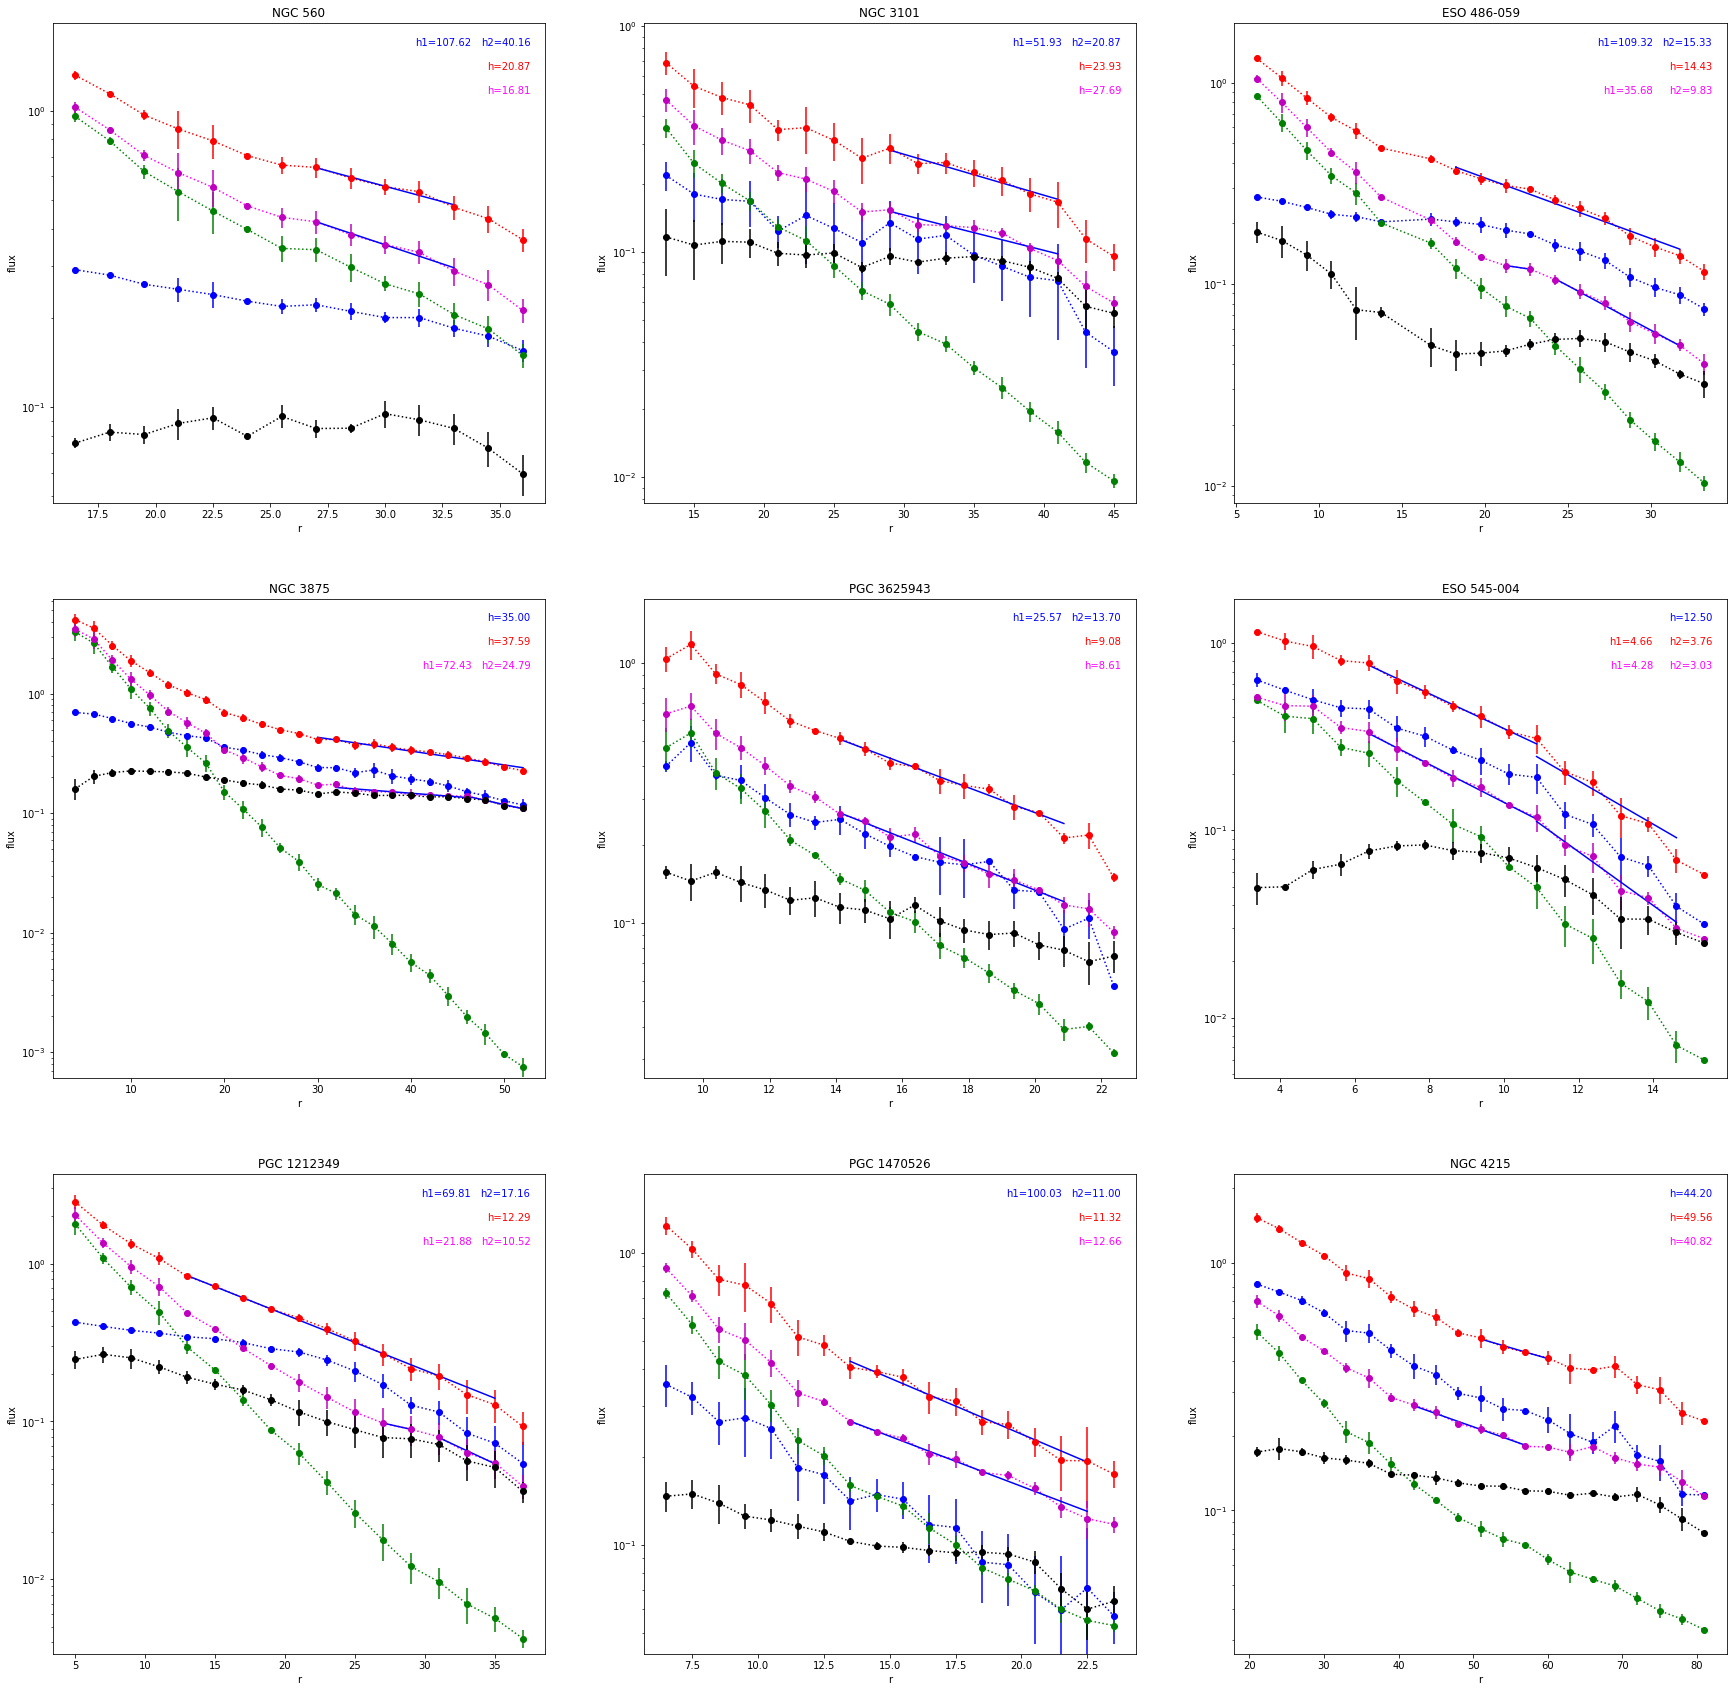

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
ellipticity = 0.7
красное-исходные
фиолетовое - исходное минус диск
зеленое-балджи
синее-модель диска
черное-вычет


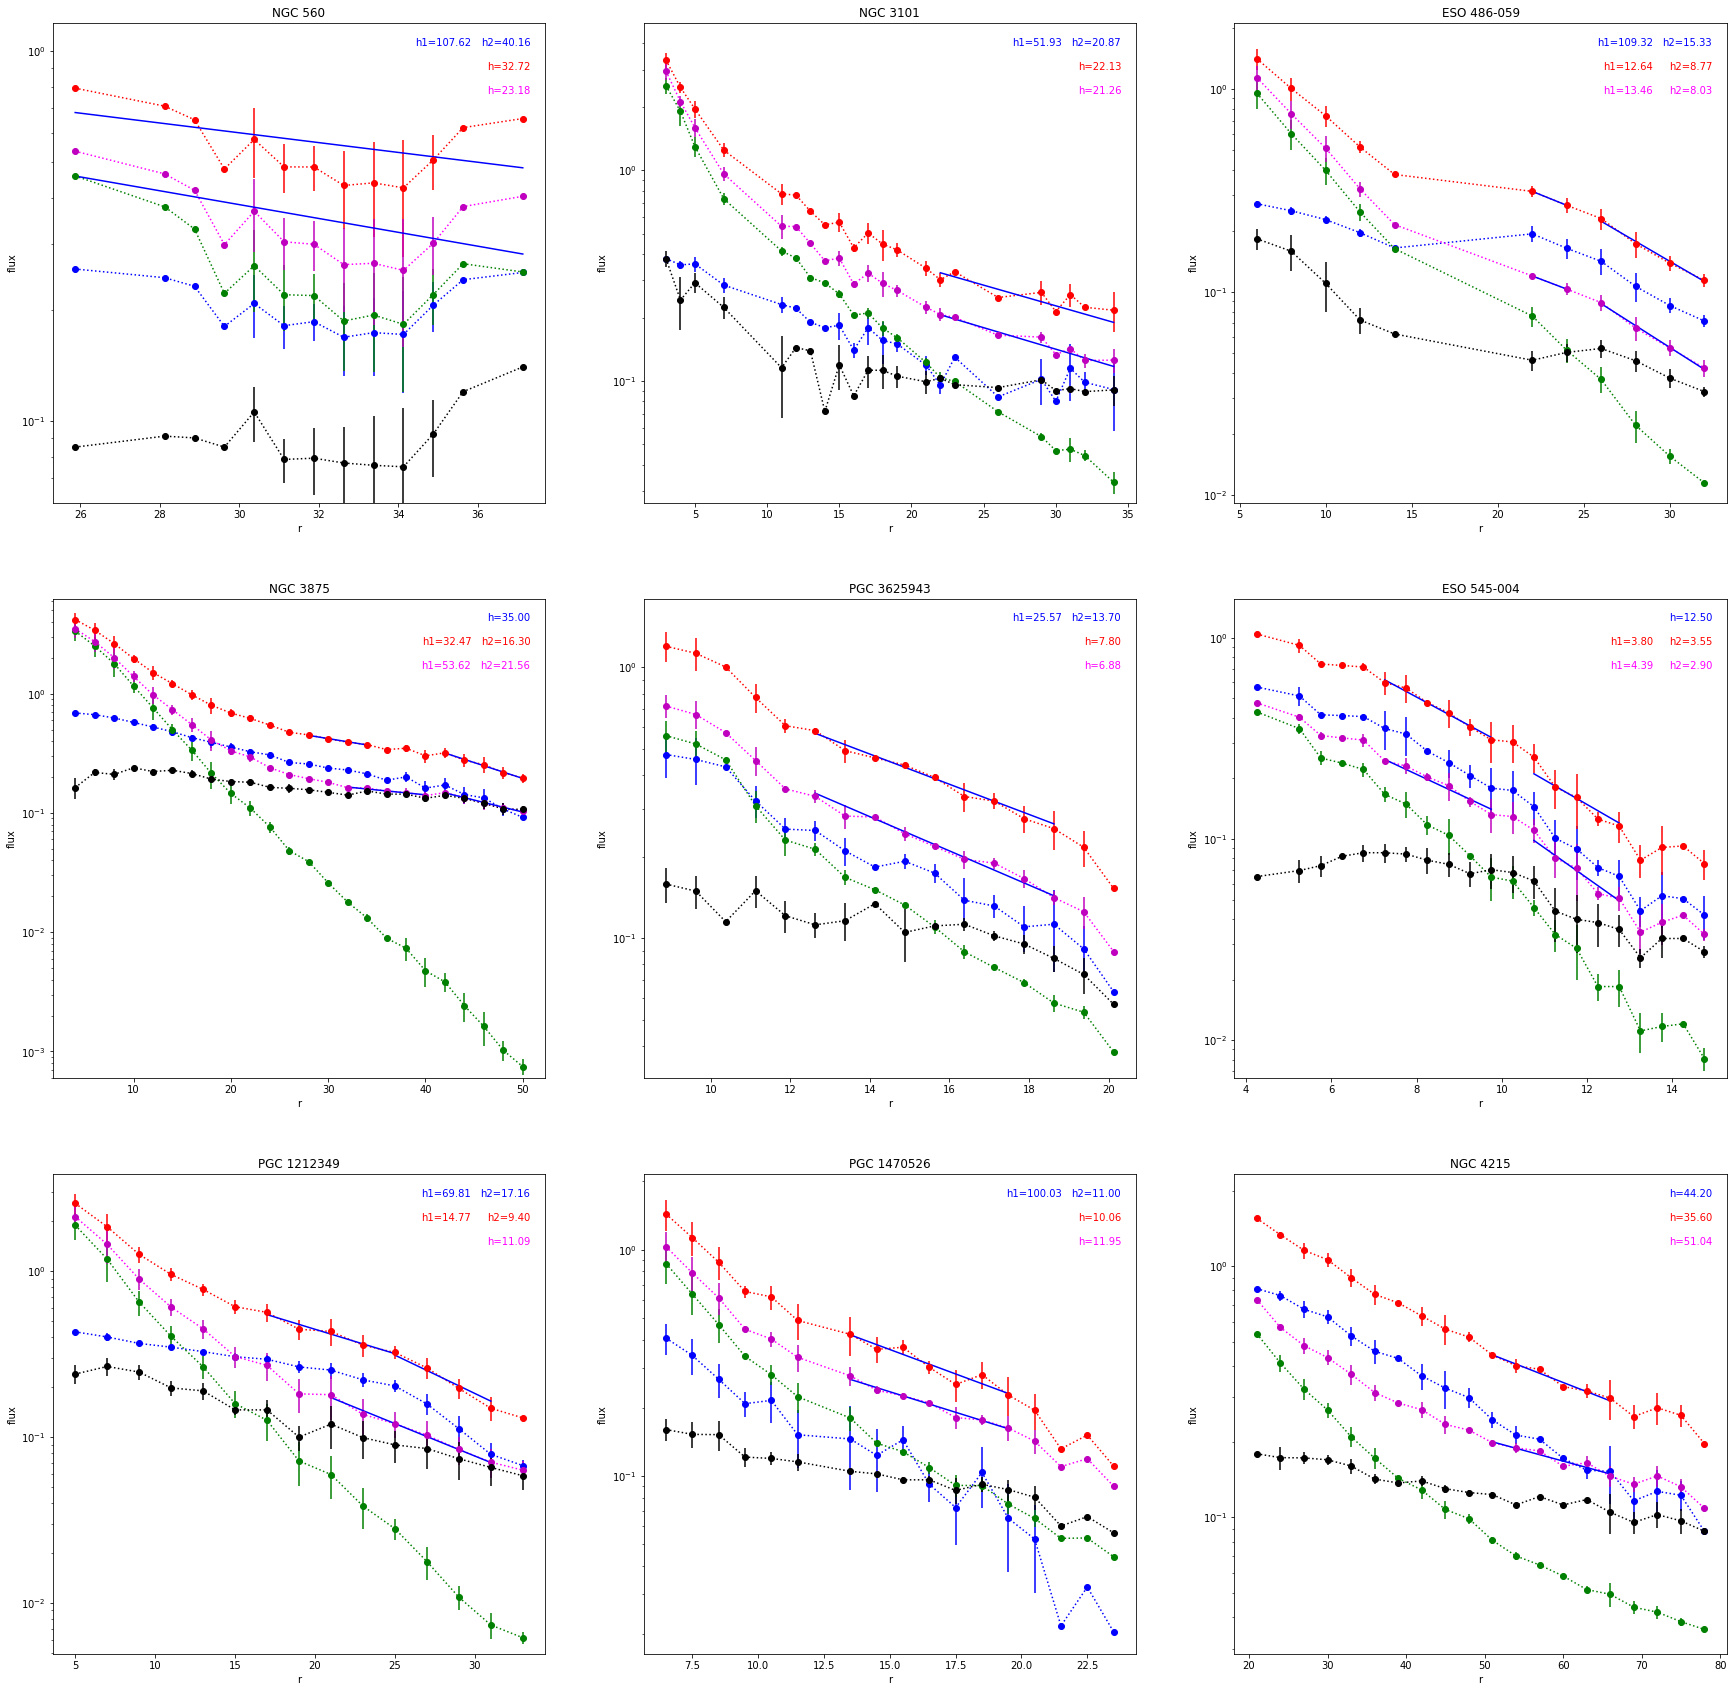

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
ellipticity = 0.3-0.4 VS 0.7


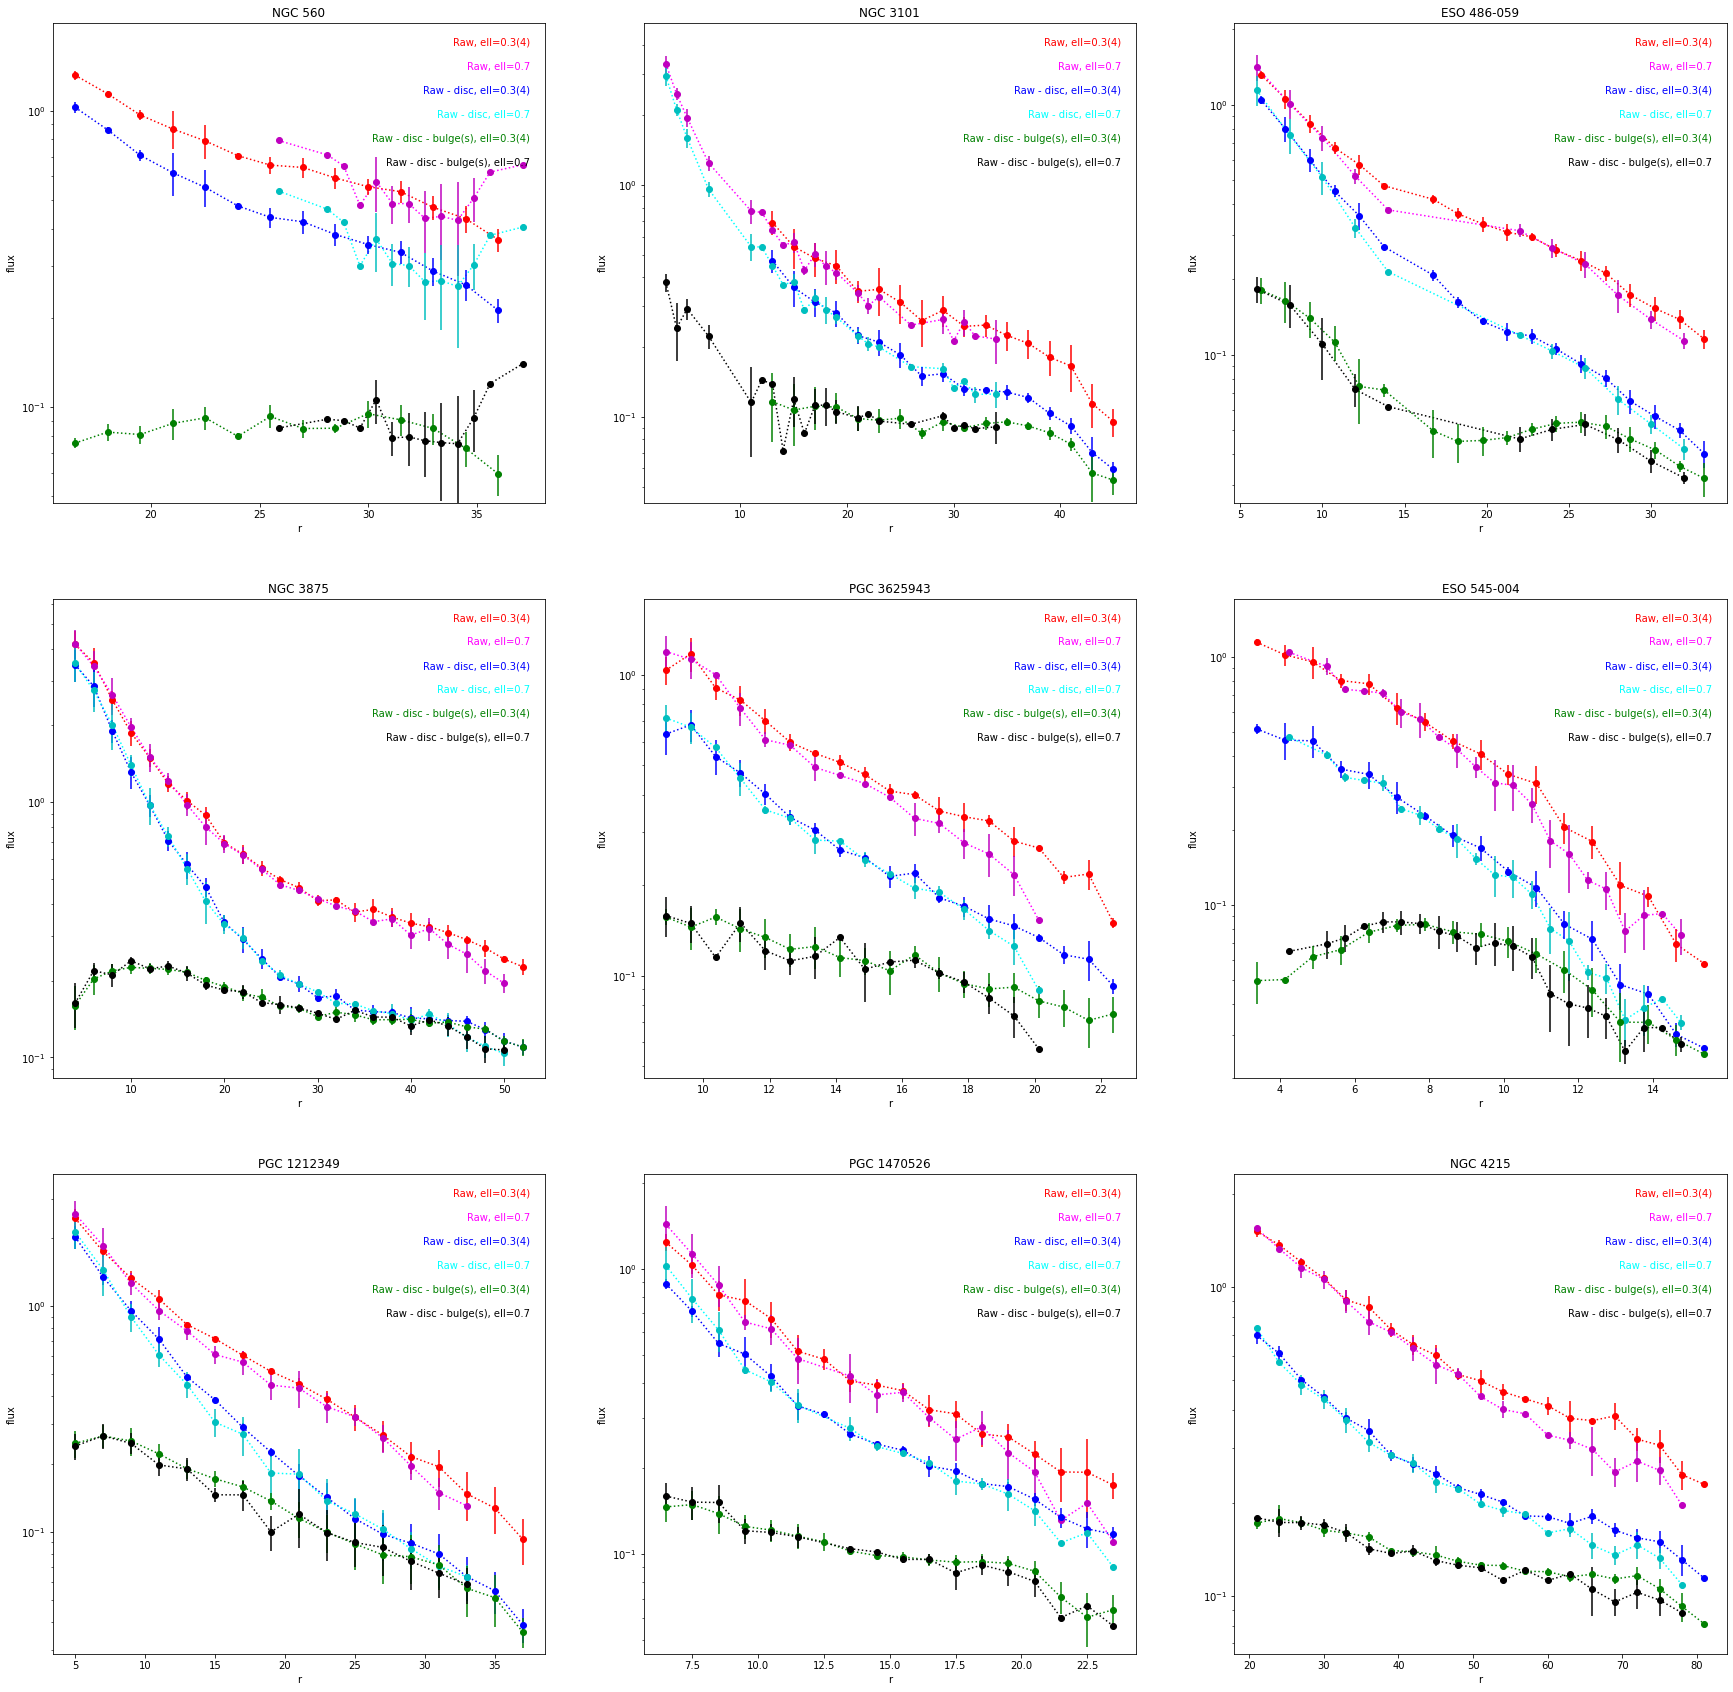

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
ellipticity = 0.3-0.4 VS 0.7


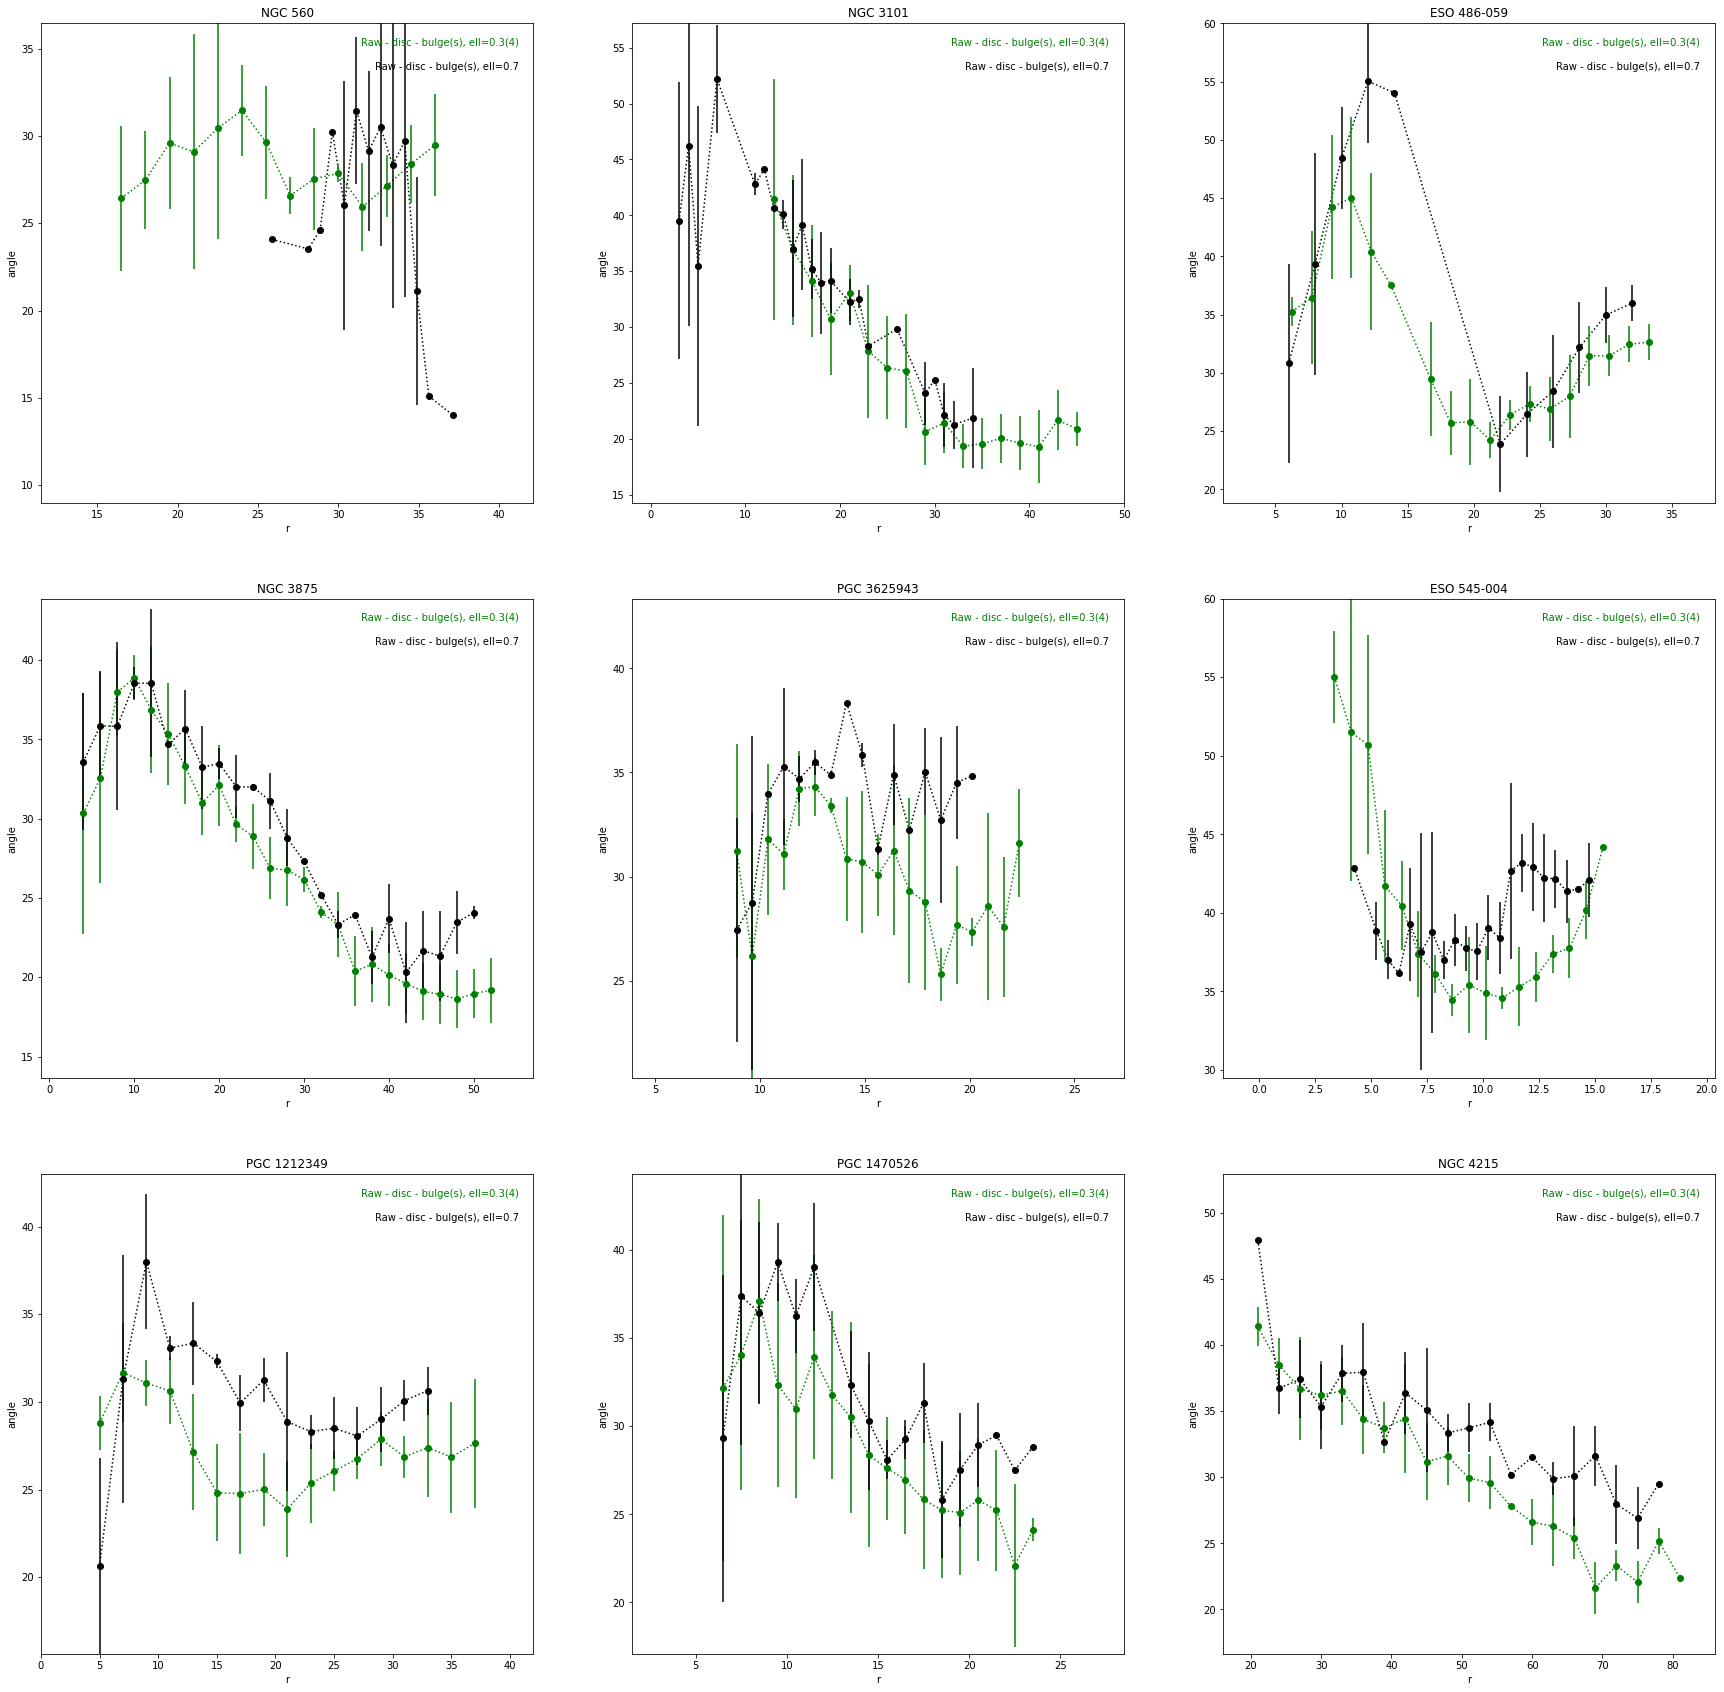

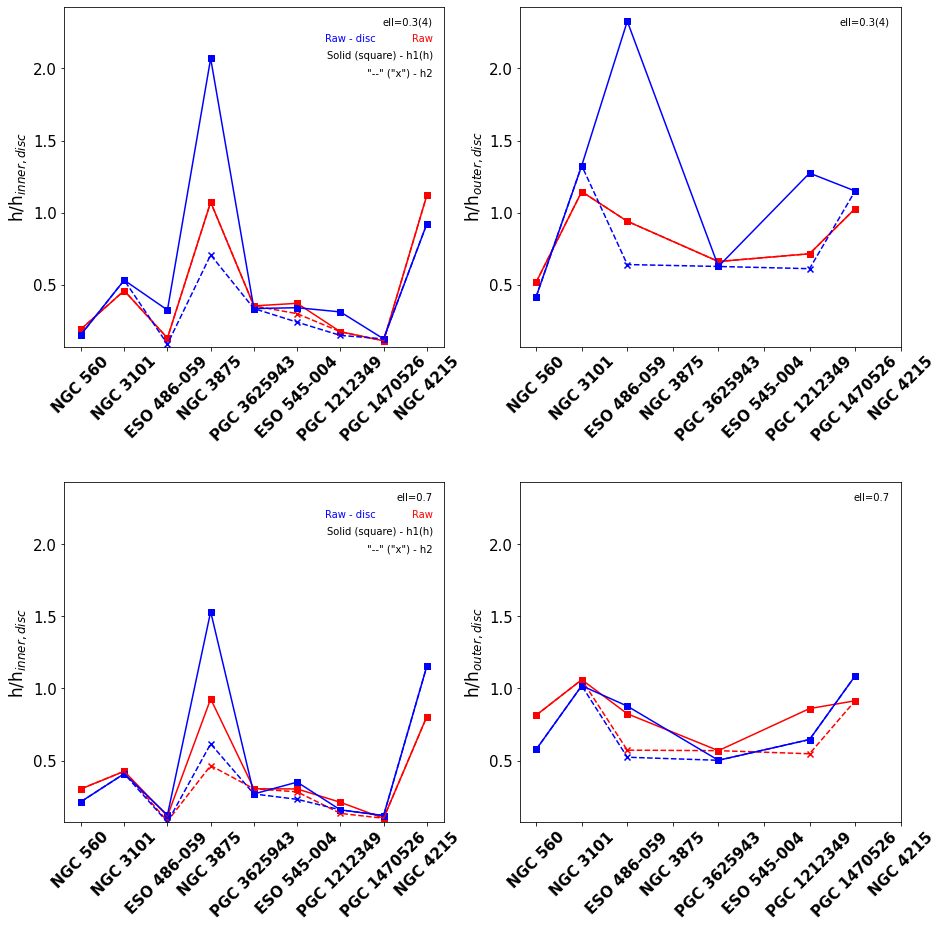

In [63]:
print('=*'*50)
print("ellipticity = 0.3-0.4")
print('красное-исходные')
print('фиолетовое - исходное минус диск')
print('зеленое-балджи')
print('синее-модель диска')
print('черное-вычет')
fig = plt.figure(figsize=[30,30])
dop = 0
radii_m,angles_m,angles_std_m = [],[],[]
intens_a,intens_d,intens_m = [],[],[]
intens_std_a,intens_std_d,intens_std_m = [],[],[]
exp_scales_a,exp_scales_d = [],[]
dist_m12 = []
for i in range(0,n_galaxies):
    
    bins = [names[i][8]*a-names[i][7] for a in range(names[i][4],names[i][5],names[i][6])]
    
    name_gal_norm = names[i][3]
    name_gal = names[i][0]
    name_gal_ell = names[i][1]
    
    path_image = './images/image_{}.fits'.format(name_gal)
    path_image_disc = './images/image_{}_d.fits'.format(name_gal)
    #path_image_disc_bulge = './images/image_{}_m.fits'.format(name_gal)
    path_model_disc = './images/model_{}_d.fits'.format(name_gal) 
    path_model_bulge = './images/model_{}_b.fits'.format(name_gal)
    path_angles_hand_m = './result/{}_m/angles_hand.dat'.format(name_gal_ell)
    path_coords_hand_m = './result/{}_m/coord_xy_peaks_hand.dat'.format(name_gal_ell)
    path_coords_hand_a = './result/{}_a/coord_xy_peaks_hand.dat'.format(name_gal_ell)
    path_coords_hand_d = './result/{}_d/coord_xy_peaks_hand.dat'.format(name_gal_ell)
    path_intens_hand_m = './result/{}_m/intensities_hand.dat'.format(name_gal_ell)  
    path_bestfit = './bestfits_decomp/bestfit_{}.imfit'.format(name_gal)
    path_config_a = './configs/config_{}_a.dat'.format(name_gal_ell)
    path_config_m = './configs/config_{}_m.dat'.format(name_gal_ell)
    path_config_d = './configs/config_{}_d.dat'.format(name_gal_ell)
    path_collage_int1 = './result/collage_int1.png'
    path_collage_int2 = './result/collage_int2.png'
    hdulist_image  = fits.open(path_image)
    data_image = hdulist_image[0].data
    hdulist_image_disc  = fits.open(path_image_disc)
    data_image_disc = hdulist_image_disc[0].data 
    #hdulist_image_disc_bulge  = fits.open(path_image_disc_bulge)
    #data_image_disc_bulge = hdulist_image_disc_bulge[0].data   
    hdulist_model_d  = fits.open(path_model_disc)
    data_model_d = hdulist_model_d[0].data 
    hdulist_model_b  = fits.open(path_model_bulge)
    data_model_b = hdulist_model_b[0].data    
    radii_hand_m = np.loadtxt(path_angles_hand_m, usecols=[0], comments='#') 
    angles_hand_m = np.loadtxt(path_angles_hand_m, usecols=np.arange(1,11), comments='#') 
    intens_hand_m = np.loadtxt(path_intens_hand_m, usecols=np.arange(1,11), comments='#')
    coords_hand_a = np.loadtxt(path_coords_hand_a, usecols=np.arange(1,17), comments='#')
    coords_hand_d = np.loadtxt(path_coords_hand_d, usecols=np.arange(1,17), comments='#')
    coords_hand_m = np.loadtxt(path_coords_hand_m, usecols=np.arange(1,17), comments='#') 
    
    radii_m.append(radii_hand_m)
        
    intens_hand_a = np.zeros((radii_hand_m.size,10))
    intens_hand_d = np.zeros((radii_hand_m.size,10))
    intens_model_d = np.zeros((radii_hand_m.size,10))
    intens_model_b = np.zeros((radii_hand_m.size,10))
    dist_m = np.zeros((radii_hand_m.size,10))
    with open(path_config_m) as file:
        for line in file:
            if line.find('x_center:') != -1:
                    xcen_m = float(line.split()[1])
            if line.find('y_center:') != -1:
                    ycen_m = float(line.split()[1])    
                    
    for jj1 in range (1,9): 
        for jj in range(radii_hand_m.size):
            dist_m[jj,jj1-1] = ((coords_hand_m[jj,jj1-1]-xcen_m)**2+(coords_hand_m[jj,jj1+7]-ycen_m)**2)**0.5
            intens_hand_a[jj,jj1-1] = data_image[int(coords_hand_m[jj,jj1+7])][int(coords_hand_m[jj,jj1-1])]
            intens_hand_d[jj,jj1-1] = data_image_disc[int(coords_hand_m[jj,jj1+7])][int(coords_hand_m[jj,jj1-1])]
            intens_model_d[jj,jj1-1] = data_model_d[int(coords_hand_m[jj,jj1+7])][int(coords_hand_m[jj,jj1-1])]
            intens_model_b[jj,jj1-1] = data_model_b[int(coords_hand_m[jj,jj1+7])][int(coords_hand_m[jj,jj1-1])]
            if intens_hand_a[jj,jj1-1] < 0:
                intens_hand_a[jj,jj1-1] = None
            if intens_hand_d[jj,jj1-1] < 0:
                intens_hand_d[jj,jj1-1] = None
            if intens_hand_m[jj,jj1-1] < 0:
                intens_hand_m[jj,jj1-1] = None

    for jj in range(radii_hand_m.size):
        for_dist_m = [intf for intf in dist_m[jj,0:8]]
        dist_m[jj,8] = np.average(for_dist_m) 
        dist_m[jj,9] = np.std(for_dist_m)
        for_intens_hand_a = [intf for intf in intens_hand_a[jj,0:8] if intf != None and intf > 0.0]
        intens_hand_a[jj,8] = np.average(for_intens_hand_a) 
        intens_hand_a[jj,9] = np.std(for_intens_hand_a)
        for_intens_hand_d = [intf for intf in intens_hand_d[jj,0:8] if intf != None and intf > 0.0]
        intens_hand_d[jj,8] = np.average(for_intens_hand_d) 
        intens_hand_d[jj,9] = np.std(for_intens_hand_d)
        for_intens_model_b = [intf for intf in intens_model_b[jj,0:8] if intf != None and intf > 0.0]
        intens_model_b[jj,8] = np.average(for_intens_model_b) 
        intens_model_b[jj,9] = np.std(for_intens_model_b)
        for_intens_model_d = [intf for intf in intens_model_d[jj,0:8] if intf != None and intf > 0.0]
        intens_model_d[jj,8] = np.average(for_intens_model_d) 
        intens_model_d[jj,9] = np.std(for_intens_model_d)
    
    #--------------------------------

    dist_m_1d = dist_m[:,0:7].ravel()
    angles_hand_m_1d = angles_hand_m[:,0:7].ravel()
    intens_hand_a_1d = intens_hand_a[:,0:7].ravel()
    intens_hand_d_1d = intens_hand_d[:,0:7].ravel()
    intens_hand_m_1d = intens_hand_m[:,0:7].ravel()
    intens_model_b_1d = intens_model_b[:,0:7].ravel()
    intens_model_d_1d = intens_model_d[:,0:7].ravel()
    ind_bins = np.digitize(dist_m_1d,bins)
    dist_m_new,intens_a_new,intens_d_new,intens_m_new,intens_mb_new,intens_md_new = [],[],[],[],[],[]
    intens_std_a_new,intens_std_d_new,intens_std_m_new,intens_std_mb_new,intens_std_md_new = [],[],[],[],[]
    angles_m_new,angles_std_m_new = [],[]
    for iii in range(len(bins)-1):
        lis_a,lis_d,lis_m,lis_mb,lis_md = [],[],[],[],[]
        lis_ang = []
        l=0
        for ind in ind_bins:
            if ind==iii+1:
                lis_a.append(intens_hand_a_1d[l])
                lis_d.append(intens_hand_d_1d[l])
                lis_m.append(intens_hand_m_1d[l])
                lis_mb.append(intens_model_b_1d[l])
                lis_md.append(intens_model_d_1d[l])
                lis_ang.append(angles_hand_m_1d[l])
            l += 1        

        dist_mi = (bins[iii]+bins[iii+1])/2.0
        intens_ai = np.average(lis_a)
        intens_di = np.average(lis_d)
        intens_mi = np.average(lis_m)
        intens_mbi = np.average(lis_mb)
        intens_mdi = np.average(lis_md)
        angles_mi = np.average(lis_ang)
        intens_std_ai = np.std(lis_a)
        intens_std_di = np.std(lis_d)
        intens_std_mi = np.std(lis_m)
        intens_std_mbi = np.std(lis_mb)
        intens_std_mdi = np.std(lis_md)
        angles_std_mi = np.std(lis_ang)
        if np.isnan(intens_mi) == False:
            dist_m_new.append(dist_mi)
            intens_a_new.append(intens_ai)
            intens_d_new.append(intens_di)
            intens_m_new.append(intens_mi)
            intens_mb_new.append(intens_mbi)
            intens_md_new.append(intens_mdi)
            intens_std_a_new.append(intens_std_ai)
            intens_std_d_new.append(intens_std_di)
            intens_std_m_new.append(intens_std_mi)
            intens_std_mb_new.append(intens_std_mbi)
            intens_std_md_new.append(intens_std_mdi)
            angles_m_new.append(angles_mi)
            angles_std_m_new.append(angles_std_mi)
  
    #-------------------------------
    
    dist_m12.append(dist_m_new)
    intens_a.append(intens_a_new)
    intens_d.append(intens_d_new)
    intens_m.append(intens_m_new)
    angles_m.append(angles_m_new)
    intens_std_a.append(intens_std_a_new)
    intens_std_d.append(intens_std_d_new)
    intens_std_m.append(intens_std_m_new)
    angles_std_m.append(angles_std_m_new)
    
    #exp_scale_a2, exp_scale_d2 = 0.0, 0.0
    dist_for_a1_i = [dist_m_new.index(x) for x in dist_m_new if x >= names[i][11] and x <= names[i][12]]
    dist_for_d1_i = [dist_m_new.index(x) for x in dist_m_new if x >= names[i][15] and x <= names[i][16]]
    dist_for_a1 = dist_m_new[min(dist_for_a1_i):max(dist_for_a1_i)+1]
    dist_for_d1 = dist_m_new[min(dist_for_d1_i):max(dist_for_d1_i)+1]
    intens_for_a1 = intens_a_new[min(dist_for_a1_i):max(dist_for_a1_i)+1]
    intens_std_for_a1 = intens_std_a_new[min(dist_for_a1_i):max(dist_for_a1_i)+1]
    intens_for_d1 = intens_d_new[min(dist_for_d1_i):max(dist_for_d1_i)+1]
    intens_std_for_d1 = intens_std_d_new[min(dist_for_d1_i):max(dist_for_d1_i)+1]
    central_value_a1, exp_scale_a1 = fit_by_explaw(np.array(dist_for_a1),np.array(intens_for_a1),
                                                 np.array(intens_std_for_a1))
    central_value_d1, exp_scale_d1 = fit_by_explaw(np.array(dist_for_d1), np.array(intens_for_d1), 
                                                 np.array(intens_std_for_d1))
    exp_scale_a2, exp_scale_d2 = exp_scale_a1, exp_scale_d1
    if names[i][13] != 0:
        dist_for_a2_i = [dist_m_new.index(x) for x in dist_m_new if x >= names[i][13] and x <= names[i][14]]
        dist_for_a2 = dist_m_new[min(dist_for_a2_i):max(dist_for_a2_i)+1]
        intens_for_a2 = intens_a_new[min(dist_for_a2_i):max(dist_for_a2_i)+1]
        intens_std_for_a2 = intens_std_a_new[min(dist_for_a2_i):max(dist_for_a2_i)+1]
        central_value_a2, exp_scale_a2 = fit_by_explaw(np.array(dist_for_a2),np.array(intens_for_a2),
                                                 np.array(intens_std_for_a2))
    if names[i][17] != 0:
        dist_for_d2_i = [dist_m_new.index(x) for x in dist_m_new if x >= names[i][17] and x <= names[i][18]]
        dist_for_d2 = dist_m_new[min(dist_for_d2_i):max(dist_for_d2_i)+1]
        intens_for_d2 = intens_d_new[min(dist_for_d2_i):max(dist_for_d2_i)+1]
        intens_std_for_d2 = intens_std_d_new[min(dist_for_d2_i):max(dist_for_d2_i)+1]
        central_value_d2, exp_scale_d2 = fit_by_explaw(np.array(dist_for_d2), np.array(intens_for_d2), 
                                                 np.array(intens_std_for_d2))
    
    exp_scales_a.append([exp_scale_a1,exp_scale_a2])
    exp_scales_d.append([exp_scale_d1,exp_scale_d2])
       
    #central_value_a, exp_scale_a = fit_by_explaw(np.array(dist_m_new),np.array(intens_a_new),
    #                                             np.array(intens_std_a_new))
    #central_value_d, exp_scale_d = fit_by_explaw(np.array(dist_m_new), np.array(intens_d_new), 
    #                                             np.array(intens_std_d_new))

      
    list_maxs,list_mins = [],[]
    list_maxs.append(max(intens_md_new))
    list_maxs.append(max(intens_mb_new))
    list_maxs.append(max(intens_a_new))
    list_maxs.append(max(intens_d_new))
    list_maxs.append(max(intens_m_new))
    list_mins.append(min(intens_md_new))
    list_mins.append(min(intens_mb_new))
    list_mins.append(min(intens_a_new))
    list_mins.append(min(intens_d_new))
    list_mins.append(min(intens_m_new))
    
    if i == 9:
        print('=*'*50)
        print("ellipticity = 0.7")
        fig = plt.figure(figsize=[30,30])
        dop = -9
        print('красное-исходные')
        print('фиолетовое - исходное минус диск')
        print('зеленое-балджи')
        print('синее-модель диска')
        print('черное-вычет')
    plt.subplot(3,3,i+1+dop)
    plt.plot(dist_m_new, intens_md_new,color='blue',linestyle=":")
    plt.plot(dist_m_new, intens_mb_new,color='green',linestyle=":")
    plt.plot(dist_m_new, intens_a_new,color='red',linestyle=":")
    plt.plot(dist_m_new, intens_d_new,color='magenta',linestyle=":")
    plt.plot(dist_m_new, intens_m_new,color='black',linestyle=":")
    plt.errorbar(x=dist_m_new, y=intens_md_new, yerr=intens_std_md_new, fmt="bo")
    plt.errorbar(x=dist_m_new, y=intens_mb_new, yerr=intens_std_mb_new, fmt="go")
    plt.errorbar(x=dist_m_new, y=intens_a_new, yerr=intens_std_a_new, fmt="ro")
    plt.errorbar(x=dist_m_new, y=intens_d_new, yerr=intens_std_d_new, fmt="mo")
    plt.errorbar(x=dist_m_new, y=intens_m_new, yerr=intens_std_m_new, fmt="ko")
    if names[i][10] != 0:
        plt.text(0.85,0.97,'h1=%1.2f' % names[i][9], ha='right',va='top',color='blue',
                                                                            transform = plt.gca().transAxes)
        plt.text(0.97,0.97,'h2=%1.2f' % names[i][10], ha='right',va='top',color='blue',
                                                                            transform = plt.gca().transAxes)
    else:
        plt.text(0.97,0.97,'h=%1.2f' % names[i][9], ha='right',va='top',color='blue',
                                                                            transform = plt.gca().transAxes)
    plt.plot(dist_for_a1, explaw([central_value_a1,exp_scale_a1],np.array(dist_for_a1)),color='b', 
                                                                              linestyle="solid")
    plt.plot(dist_for_d1, explaw([central_value_d1,exp_scale_d1],np.array(dist_for_d1)),color='b', 
                                                                              linestyle="solid")
    if names[i][13] != 0:
        plt.plot(dist_for_a2, explaw([central_value_a2,exp_scale_a2],np.array(dist_for_a2)),color='b', 
                                                                              linestyle="solid")
        plt.text(0.85,0.92,'h1=%1.2f' % exp_scale_a1, ha='right',va='top',color='red',
                                                                            transform = plt.gca().transAxes) 
        plt.text(0.97,0.92,'h2=%1.2f' % exp_scale_a2, ha='right',va='top',color='red',
                                                                            transform = plt.gca().transAxes)
    else:
        plt.text(0.97,0.92,'h=%1.2f' % exp_scale_a1, ha='right',va='top',color='red',
                                                                            transform = plt.gca().transAxes)
    if names[i][17] != 0:
        plt.plot(dist_for_d2, explaw([central_value_d2,exp_scale_d2],np.array(dist_for_d2)),color='b', 
                                                                              linestyle="solid")
        plt.text(0.85,0.87,'h1=%1.2f' % exp_scale_d1, ha='right',va='top',color='magenta',
                                                                            transform = plt.gca().transAxes) 
        plt.text(0.97,0.87,'h2=%1.2f' % exp_scale_d2, ha='right',va='top',color='magenta',
                                                                            transform = plt.gca().transAxes)
    else:
         plt.text(0.97,0.87,'h=%1.2f' % exp_scale_d1, ha='right',va='top',color='magenta',
                                                                            transform = plt.gca().transAxes)      
   # plt.text(0.97,0.97,'h=%1.4f' % exp_scale_a, ha='right',va='top',color='red',transform = plt.gca().transAxes)
   # plt.text(0.97,0.92,'h=%1.4f' % exp_scale_d, ha='right',va='top',color='magenta',transform = plt.gca().transAxes)
   # plt.text(0.97,0.87,'h=%1.4f' % exp_scale_m, ha='right',va='top',color='black',transform = plt.gca().transAxes)
   # plt.text(0.92,0.82,'disc_incl=%1.4f' % disc_inc, ha='right',va='top',color='black',transform = plt.gca().transAxes)
   # plt.text(0.82,0.97,'Raw image', ha='right',va='top',color='red',transform = plt.gca().transAxes)
   # plt.text(0.82,0.92,'Raw image - disc', ha='right',va='top',color='magenta',transform = plt.gca().transAxes)
   # plt.text(0.82,0.87,'Raw image - disc - bulge(s)', ha='right',va='top',color='black',transform = plt.gca().transAxes)
   # plt.text(0.58,0.97,'Disc', ha='right',va='top',color='blue',transform = plt.gca().transAxes)
   # plt.text(0.67,0.97,'Bulge(s)', ha='right',va='top',color='green',transform = plt.gca().transAxes)
    plt.xlabel("r")
    plt.ylabel("flux")
    plt.yscale('log')
    plt.ylim([min(list_mins)-0.2*min(list_mins),max(list_maxs)+0.5*max(list_maxs)])
    plt.title(name_gal_norm)
    if i == 8:
        plt.savefig(path_collage_int1,dpi=200,bbox_inches = 'tight',pad_inches = 0.1)
        plt.show()
    if i == 17:
        plt.savefig(path_collage_int2,dpi=200,bbox_inches = 'tight',pad_inches = 0.1)
        plt.show()

if n_galaxies == 18:
    print('=*'*50)
    print("ellipticity = 0.3-0.4 VS 0.7")    
    fig = plt.figure(figsize=[30,30])
    for i in range(0,9):
        name_gal_norm = names[i][3]
        list_maxs, list_mins = [],[]
        list_maxs.append(max(intens_a[i]))
        list_maxs.append(max(intens_a[i+9]))
        list_maxs.append(max(intens_d[i]))
        list_maxs.append(max(intens_d[i+9]))
        list_maxs.append(max(intens_m[i]))
        list_maxs.append(max(intens_m[i+9]))
        list_mins.append(min(intens_a[i]))
        list_mins.append(min(intens_a[i+9]))
        list_mins.append(min(intens_d[i]))
        list_mins.append(min(intens_d[i+9]))
        list_mins.append(min(intens_m[i]))
        list_mins.append(min(intens_m[i+9]))
    #    central_value_a1, exp_scale_a1 = fit_by_explaw(np.array(dist_m12[i]), np.array(intens_a[i]), 
    #                                                   np.array(intens_std_a[i]))
    #    central_value_a2, exp_scale_a2 = fit_by_explaw(np.array(dist_m12[i+9]), np.array(intens_a[i+9]), 
    #                                                   np.array(intens_std_a[i+9]))
    #    central_value_d1, exp_scale_d1 = fit_by_explaw(np.array(dist_m12[i]),np.array(intens_d[i]),
    #                                                   np.array(intens_std_d[i]))
    #    central_value_d2, exp_scale_d2 = fit_by_explaw(np.array(dist_m12[i+9]), np.array(intens_d[i+9]), 
    #                                                   np.array(intens_std_d[i+9]))
      #  central_value_m1, exp_scale_m1 = fit_by_explaw(np.array(dist_m12[i]), np.array(intens_m[i]), 
      #                                                 np.array(intens_std_m[i]))
      #  central_value_m2, exp_scale_m2 = fit_by_explaw(np.array(dist_m12[i+9]), np.array(intens_m[i+9]), 
      #                                                 np.array(intens_std_m[i+9]))
        plt.subplot(3,3,i+1)
        plt.plot(dist_m12[i], intens_a[i],color='red',linestyle=":")
        plt.plot(dist_m12[i+9], intens_a[i+9],color='magenta',linestyle=":")
        plt.plot(dist_m12[i], intens_d[i],color='blue',linestyle=":")
        plt.plot(dist_m12[i+9], intens_d[i+9],color='cyan',linestyle=":")
        plt.plot(dist_m12[i], intens_m[i],color='green',linestyle=":")
        plt.plot(dist_m12[i+9], intens_m[i+9],color='black',linestyle=":")
        plt.errorbar(x=dist_m12[i], y=intens_a[i], yerr=intens_std_a[i], fmt="ro")
        plt.errorbar(x=dist_m12[i+9], y=intens_a[i+9], yerr=intens_std_a[i+9], fmt="mo")
        plt.errorbar(x=dist_m12[i], y=intens_d[i], yerr=intens_std_d[i], fmt="bo")
        plt.errorbar(x=dist_m12[i+9], y=intens_d[i+9], yerr=intens_std_d[i+9], fmt="co")
        plt.errorbar(x=dist_m12[i], y=intens_m[i], yerr=intens_std_m[i], fmt="go")
        plt.errorbar(x=dist_m12[i+9], y=intens_m[i+9], yerr=intens_std_m[i+9], fmt="ko")
        #plt.plot(radii_m[i], explaw([central_value_a1,exp_scale_a1],radii_m[i]),color='b', linestyle="solid")
        #plt.plot(radii_m[i+9], explaw([central_value_a2,exp_scale_a2],radii_m[i+9]),color='b', linestyle="solid")
        #plt.plot(radii_m[i], explaw([central_value_d1,exp_scale_d1],radii_m[i]),color='b', linestyle="solid")
        #plt.plot(radii_m[i+9], explaw([central_value_d2,exp_scale_d2],radii_m[i+9]),color='b', linestyle="solid")
        #plt.plot(radii_m[i], explaw([central_value_m1,exp_scale_m1],radii_m[i]),color='b', linestyle="solid")
        #plt.plot(radii_m[i+9], explaw([central_value_m2,exp_scale_m2],radii_m[i+9]),color='b', linestyle="solid")
      #  plt.text(0.97,0.97,'h=%1.4f' % exp_scale_a1, ha='right',va='top',color='red',transform = plt.gca().transAxes)
      #  plt.text(0.97,0.92,'h=%1.4f' % exp_scale_a2, ha='right',va='top',color='magenta',transform = plt.gca().transAxes)
      #  plt.text(0.97,0.87,'h=%1.4f' % exp_scale_d1, ha='right',va='top',color='blue',transform = plt.gca().transAxes)
      #  plt.text(0.97,0.82,'h=%1.4f' % exp_scale_d2, ha='right',va='top',color='cyan',transform = plt.gca().transAxes)
      #  plt.text(0.97,0.77,'h=%1.4f' % exp_scale_m1, ha='right',va='top',color='green',transform = plt.gca().transAxes)
      #  plt.text(0.97,0.72,'h=%1.4f' % exp_scale_m2, ha='right',va='top',color='black',transform = plt.gca().transAxes)
        plt.text(0.97,0.97,'Raw, ell=0.3(4)', ha='right',va='top',color='red',transform = plt.gca().transAxes)
        plt.text(0.97,0.92,'Raw, ell=0.7', ha='right',va='top',color='magenta',transform = plt.gca().transAxes)
        plt.text(0.97,0.87,'Raw - disc, ell=0.3(4)', ha='right',va='top',color='blue',transform = plt.gca().transAxes)
        plt.text(0.97,0.82,'Raw - disc, ell=0.7', ha='right',va='top',color='cyan',transform = plt.gca().transAxes)
        plt.text(0.97,0.77,'Raw - disc - bulge(s), ell=0.3(4)', ha='right',va='top',color='green',transform = plt.gca().transAxes)
        plt.text(0.97,0.72,'Raw - disc - bulge(s), ell=0.7', ha='right',va='top',color='black',transform = plt.gca().transAxes)
        plt.xlabel("r")
        plt.ylabel("flux")
        plt.yscale('log')
        plt.ylim([min(list_mins)-0.2*min(list_mins),max(list_maxs)+0.5*max(list_maxs)])
        plt.title(name_gal_norm)
    path_collage_int12 = './result/collage_int12.png'
    plt.savefig(path_collage_int12,dpi=200,bbox_inches = 'tight',pad_inches = 0.1)
    plt.show()

    fig = plt.figure(figsize=[30,30])
    print('=*'*50)
    print("ellipticity = 0.3-0.4 VS 0.7") 
    for i in range(0,9):
        list_x_maxs, list_x_mins,list_y_maxs, list_y_mins = [],[],[],[] 
        list_y_maxs.append(max(angles_m[i]))
        list_y_maxs.append(max(angles_m[i+9]))
        list_y_mins.append(min(angles_m[i]))
        list_y_mins.append(min(angles_m[i+9]))
        list_x_maxs.append(max(dist_m12[i]))
        list_x_maxs.append(max(dist_m12[i+9]))
        list_x_mins.append(min(dist_m12[i]))
        list_x_mins.append(min(dist_m12[i+9]))
        plt.subplot(3,3,i+1)
        plt.plot(dist_m12[i],angles_m[i], color='green', linestyle=":")
        plt.plot(dist_m12[i+9],angles_m[i+9], color='black', linestyle=":")
        plt.errorbar(x=dist_m12[i], y=angles_m[i], yerr=angles_std_m[i], fmt="go")
        plt.errorbar(x=dist_m12[i+9], y=angles_m[i+9], yerr=angles_std_m[i+9], fmt="ko")
        plt.text(0.97,0.97,'Raw - disc - bulge(s), ell=0.3(4)', ha='right',va='top',color='green',transform = plt.gca().transAxes)
        plt.text(0.97,0.92,'Raw - disc - bulge(s), ell=0.7', ha='right',va='top',color='black',transform = plt.gca().transAxes)
        plt.xlim([min(list_x_mins)-5,max(list_x_maxs)+5])
        plt.ylim([min(list_y_mins)-5,max(list_y_maxs)+5])
        plt.title(names_norm[i])
        plt.xlabel("r")
        plt.ylabel("angle")
    path_collage_ang12 = './result/collage_ang12.png'
    plt.savefig(path_collage_ang12,dpi=200,bbox_inches = 'tight',pad_inches = 0.1)
    plt.show()

# ---------- Масштабы ---------------------------
all_scales = []
exp_scales_a1_to_h1d,exp_scales_d1_to_h1d,exp_scales_a1_to_h2d,exp_scales_d1_to_h2d = [],[],[],[]
exp_scales_a2_to_h1d,exp_scales_d2_to_h1d,exp_scales_a2_to_h2d,exp_scales_d2_to_h2d = [],[],[],[]
ticks_names = []
for i in range(0,18):
    a_i = [x/names[i][9] for x in exp_scales_a[i]]
    d_i = [x/names[i][9] for x in exp_scales_d[i]]
    exp_scales_a1_to_h1d.append(a_i[0])
    exp_scales_a2_to_h1d.append(a_i[1])
    exp_scales_d1_to_h1d.append(d_i[0])
    exp_scales_d2_to_h1d.append(d_i[1])
    for j in range(0,2):
        all_scales.append(a_i[j])
        all_scales.append(d_i[j])
    if names[i][10] != 0:
        a_i = [x/names[i][10] for x in exp_scales_a[i]]
        d_i = [x/names[i][10] for x in exp_scales_d[i]]
        exp_scales_a1_to_h2d.append(a_i[0])
        exp_scales_a2_to_h2d.append(a_i[1])
        exp_scales_d1_to_h2d.append(d_i[0])
        exp_scales_d2_to_h2d.append(d_i[1])
        for j in range(0,2):
            all_scales.append(a_i[j])
            all_scales.append(d_i[j])
    else:
        exp_scales_a1_to_h2d.append(None)
        exp_scales_a2_to_h2d.append(None)
        exp_scales_d1_to_h2d.append(None)
        exp_scales_d2_to_h2d.append(None)
    if i < 9:
        ticks_names.append(names[i][3])

fig = plt.figure(figsize=[15,15])
plt.subplots_adjust(hspace=0.4)
path_scales = './result/scales.png'
min_scale = min(all_scales)
max_scale = max(all_scales)
for i in range(0,4):    
    plt.subplot(2,2,i+1)
    
    if i == 0:
        plt.plot(ticks_names,exp_scales_a1_to_h1d[0:9],color='red', linestyle="solid")
        plt.plot(ticks_names,exp_scales_a2_to_h1d[0:9],color='red', linestyle="--")
        plt.plot(ticks_names,exp_scales_d1_to_h1d[0:9],color='blue', linestyle="solid")
        plt.plot(ticks_names,exp_scales_d2_to_h1d[0:9],color='blue', linestyle="--")
        plt.scatter(ticks_names,exp_scales_a1_to_h1d[0:9],color='red', marker="s")
        plt.scatter(ticks_names,exp_scales_a2_to_h1d[0:9],color='red', marker="x")
        plt.scatter(ticks_names,exp_scales_d1_to_h1d[0:9],color='blue', marker="s")
        plt.scatter(ticks_names,exp_scales_d2_to_h1d[0:9],color='blue', marker="x")
    if i == 1:
        xs = np.arange(9)
        series1 = np.array(exp_scales_a1_to_h2d[0:9]).astype(np.double)
        series2 = np.array(exp_scales_a2_to_h2d[0:9]).astype(np.double)
        series3 = np.array(exp_scales_d1_to_h2d[0:9]).astype(np.double)
        series4 = np.array(exp_scales_d2_to_h2d[0:9]).astype(np.double)
        mask1 = np.isfinite(series1)
        mask2 = np.isfinite(series2)
        mask3 = np.isfinite(series3)
        mask4 = np.isfinite(series4)               
        plt.plot(xs[mask1],series1[mask1],color='red', linestyle="solid")
        plt.plot(xs[mask2],series2[mask2],color='red', linestyle="--")
        plt.plot(xs[mask3],series3[mask3],color='blue', linestyle="solid")
        plt.plot(xs[mask4],series4[mask4],color='blue', linestyle="--")
        plt.scatter(ticks_names,exp_scales_a1_to_h2d[0:9],color='red', marker="s")
        plt.scatter(ticks_names,exp_scales_a2_to_h2d[0:9],color='red', marker="x")
        plt.scatter(ticks_names,exp_scales_d1_to_h2d[0:9],color='blue', marker="s")
        plt.scatter(ticks_names,exp_scales_d2_to_h2d[0:9],color='blue', marker="x")
    if i == 2:
        plt.plot(ticks_names,exp_scales_a1_to_h1d[9:18],color='red', linestyle="solid")
        plt.plot(ticks_names,exp_scales_a2_to_h1d[9:18],color='red', linestyle="--")
        plt.plot(ticks_names,exp_scales_d1_to_h1d[9:18],color='blue', linestyle="solid")
        plt.plot(ticks_names,exp_scales_d2_to_h1d[9:18],color='blue', linestyle="--")
        plt.scatter(ticks_names,exp_scales_a1_to_h1d[9:18],color='red', marker="s")
        plt.scatter(ticks_names,exp_scales_a2_to_h1d[9:18],color='red', marker="x")
        plt.scatter(ticks_names,exp_scales_d1_to_h1d[9:18],color='blue', marker="s")
        plt.scatter(ticks_names,exp_scales_d2_to_h1d[9:18],color='blue', marker="x")
    if i == 3:
        xs = np.arange(9)
        series1 = np.array(exp_scales_a1_to_h2d[9:18]).astype(np.double)
        series2 = np.array(exp_scales_a2_to_h2d[9:18]).astype(np.double)
        series3 = np.array(exp_scales_d1_to_h2d[9:18]).astype(np.double)
        series4 = np.array(exp_scales_d2_to_h2d[9:18]).astype(np.double)
        mask1 = np.isfinite(series1)
        mask2 = np.isfinite(series2)
        mask3 = np.isfinite(series3)
        mask4 = np.isfinite(series4)
        plt.plot(xs[mask1],series1[mask1],color='red', linestyle="solid")
        plt.plot(xs[mask2],series2[mask2],color='red', linestyle="--")
        plt.plot(xs[mask3],series3[mask3],color='blue', linestyle="solid")
        plt.plot(xs[mask4],series4[mask4],color='blue', linestyle="--")
        plt.scatter(ticks_names,exp_scales_a1_to_h2d[9:18],color='red', marker="s")
        plt.scatter(ticks_names,exp_scales_a2_to_h2d[9:18],color='red', marker="x")
        plt.scatter(ticks_names,exp_scales_d1_to_h2d[9:18],color='blue', marker="s")
        plt.scatter(ticks_names,exp_scales_d2_to_h2d[9:18],color='blue', marker="x")
    
    plt.gca().set_xticks([0,1,2,3,4,5,6,7,8])
    plt.gca().set_xticklabels(ticks_names)
    plt.xticks(rotation=45,fontsize=15,fontweight='semibold')
    plt.yticks(fontsize=15)
    
    if i == 0 or i == 2:
        if i == 0:
            plt.text(0.97,0.97,'ell=0.3(4)', ha='right',va='top',color='black',
                                                                     transform = plt.gca().transAxes)
        else:
            plt.text(0.97,0.97,'ell=0.7', ha='right',va='top',color='black',transform = plt.gca().transAxes)
        plt.text(0.97,0.92,'Raw', ha='right',va='top',color='red',transform = plt.gca().transAxes)
        plt.text(0.82,0.92,'Raw - disc', ha='right',va='top',color='blue',transform = plt.gca().transAxes)
        plt.text(0.97,0.87,'Solid (square) - h1(h)', ha='right',va='top',color='black',
                                                                           transform = plt.gca().transAxes)
        plt.text(0.97,0.82,'"--" ("x") - h2', ha='right',va='top',color='black',
                                                                           transform = plt.gca().transAxes)
        plt.ylabel("h/h$_{inner,disc}$",fontsize=17)
    else:
        plt.ylabel("h/h$_{outer,disc}$",fontsize=17)
    if i == 1:
        plt.text(0.97,0.97,'ell=0.3(4)', ha='right',va='top',color='black',transform = plt.gca().transAxes)
    if i == 3:
        plt.text(0.97,0.97,'ell=0.7', ha='right',va='top',color='black',transform = plt.gca().transAxes)
        
    plt.ylim([min_scale,max_scale+0.1])
    
plt.savefig(path_scales,dpi=400,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()        

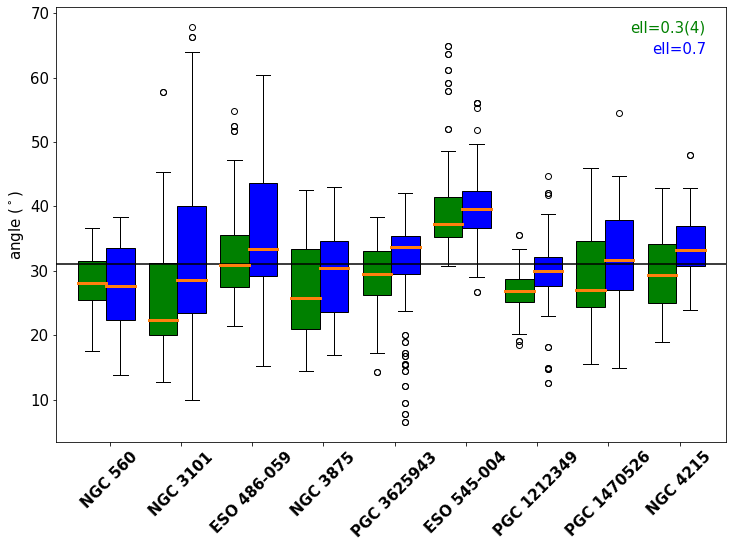

In [266]:
fig = plt.figure(figsize=[12,8])
path_distrib_ang = './result/distrib_ang.png'
angles,positions,colors,ticks_names,ticks_locat = [],[],[],[],[]
dop = 1
for i in range(0,9):
    name_gal = names_norm[i]
    name_gal_ell1 = names[i][1]
    name_gal_ell2 = names[i+9][1]
    path_ang_file1 = './result/{}_m/angles_hand.dat'.format(name_gal_ell1)
    path_ang_file2 = './result/{}_m/angles_hand.dat'.format(name_gal_ell2)
    angles_01 = np.loadtxt(path_ang_file1, usecols=np.arange(1,9), comments='#')
    angles_02 = np.loadtxt(path_ang_file2, usecols=np.arange(1,9), comments='#')
    angles_1 = angles_01.ravel()
    angles_2 = angles_02.ravel()
    angles.append(angles_1)
    angles.append(angles_2)
    positions.append(i+1)
    positions.append(i+1.40)
    colors.append('green')
    colors.append('blue')
    ticks_names.append(name_gal)
    ticks_locat.append(i+1.25)
angles_all = list(np.concatenate(angles))
mean_angle = np.average(angles_all) 
#median_angle = np.median(angles_all) 

bp = plt.gca().boxplot(angles,patch_artist = True,positions=positions,widths=0.4)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for median in bp['medians']:
    median.set(linewidth = 3)

plt.gca().set_xticks(ticks_locat)
plt.gca().set_xticklabels(ticks_names)
plt.xticks(rotation=45,fontsize=15,fontweight='semibold')
plt.yticks(fontsize=15)
plt.ylabel("angle ($^\circ$)",fontsize=15)
plt.axhline(y=mean_angle,color='black')
#plt.axhline(y=median_angle,color='black',linestyle='--')
plt.text(0.97,0.97,'ell=0.3(4)',ha='right',va='top',color='green',fontsize=15,transform = plt.gca().transAxes)
plt.text(0.97,0.92,'ell=0.7',ha='right',va='top',color='blue',fontsize=15,transform = plt.gca().transAxes)

plt.savefig(path_distrib_ang,dpi=400,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()